In [1]:
import numpy as np
import pandas as pd

In [3]:
g1 = pd.DataFrame(np.random.randint(80,100, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g2 = pd.DataFrame(np.random.randint(70,79, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g3 = pd.DataFrame(np.random.randint(60,69, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g4 = pd.DataFrame(np.random.randint(50,59, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g5 = pd.DataFrame(np.random.randint(40,49, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g6 = pd.DataFrame(np.random.randint(33,39, size=(800000,5)), columns = ["s1",'s2','s3','s4','s5'])
g7 = pd.DataFrame(np.random.randint(0,32, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])

df = pd.concat([g1,g2,g3,g4,g5,g6,g7])
print(len(df))
df = df.drop_duplicates()# get all unique records
print(len(df))
df.head()

1040000
203815


,s1,s2,s3,s4,s5
0,99,83,92,91,94
1,94,94,93,80,99
2,82,82,90,86,81
3,96,80,82,98,92
4,94,95,80,90,95


In [4]:
df.tail()

,s1,s2,s3,s4,s5
39995,26,11,31,21,15
39996,26,12,6,31,5
39997,29,13,14,8,19
39998,21,24,19,15,13
39999,14,27,4,26,20


# Symbolic AI

In [5]:
def grade(sb1,sb2, sb3, sb4, sb5):
    total = 500
    obtain = sb1 + sb2 + sb3 + sb4 + sb5
    per = (obtain / total) * 100
    
    grade = None
    
    if per >= 80:
        grade = "A+"
    elif per >= 70:
        grade = "A"
    elif per >= 60:
        grade = "B"
    elif per >= 50:
        grade = "C"
    elif per >= 40:
        grade = "D"
    elif per >= 33:
        grade = "E"
    else:
        grade = "Fail"
        
    return total, obtain , per , grade

# df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(*x), axis=1, result_type='expand')
df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(x[0],x[1],x[2],x[3],x[4]), axis=1, result_type='expand')
df

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,99,83,92,91,94,500,459,91.8,A+
1,94,94,93,80,99,500,460,92.0,A+
2,82,82,90,86,81,500,421,84.2,A+
3,96,80,82,98,92,500,448,89.6,A+
4,94,95,80,90,95,500,454,90.8,A+
...,...,...,...,...,...,...,...,...,...
39995,26,11,31,21,15,500,104,20.8,Fail
39996,26,12,6,31,5,500,80,16.0,Fail
39997,29,13,14,8,19,500,83,16.6,Fail
39998,21,24,19,15,13,500,92,18.4,Fail


In [6]:
df.Grade.value_counts()

Fail    39972
A+      39705
A       29158
C       29116
D       29057
B       29031
E        7776
Name: Grade, dtype: int64

In [8]:
df1 = pd.DataFrame()
test = pd.DataFrame()
for i in df.Grade.unique():
    df1 = pd.concat([df1,df[df.Grade==i].head(7676)])
    test = pd.concat([test,df[df.Grade==i].tail(100)])
print(len(df1))
print(len(test))

53732
700


# Create data for ML

In [9]:
data = df1[["s1","s2","s3",'s4','s5',"Percentage",'Grade']].copy()
data = data.sample(frac=1)
data

,s1,s2,s3,s4,s5,Percentage,Grade
4880,60,66,68,62,65,64.2,B
2791,73,75,75,78,71,74.4,A
1769,45,43,46,48,40,44.4,D
6206,96,83,88,81,93,88.2,A+
5198,47,44,48,42,47,45.6,D
...,...,...,...,...,...,...,...
7990,77,70,72,77,74,74.0,A
24,73,73,70,72,71,71.8,A
1251,75,75,72,75,75,74.4,A
2268,50,52,51,57,52,52.4,C


In [11]:
data.corr()

,s1,s2,s3,s4,s5,Percentage
s1,1.000000,0.961180,0.961374,0.961118,0.961244,0.984289
s2,0.961180,1.000000,0.961674,0.961306,0.961208,0.984380
s3,0.961374,0.961674,1.000000,0.961732,0.961708,0.984640
s4,0.961118,0.961306,0.961732,1.000000,0.961519,0.984451
s5,0.961244,0.961208,0.961708,0.961519,1.000000,0.984447
Percentage,0.984289,0.984380,0.984640,0.984451,0.984447,1.000000


<AxesSubplot:>

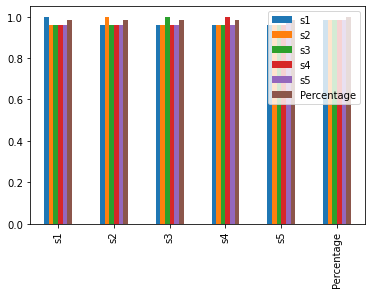

In [12]:
data.corr().plot(kind='bar')

In [14]:
grades = {
    "A+":7,
    "A":6,
    "B":5,
    "C":4,
    "D":3,
    "E":2,
    "Fail":1
}

data['Grade1'] = data.Grade.map(grades)# map with dictionary
data

,s1,s2,s3,s4,s5,Percentage,Grade,Grade1
4880,60,66,68,62,65,64.2,B,5
2791,73,75,75,78,71,74.4,A,6
1769,45,43,46,48,40,44.4,D,3
6206,96,83,88,81,93,88.2,A+,7
5198,47,44,48,42,47,45.6,D,3
...,...,...,...,...,...,...,...,...
7990,77,70,72,77,74,74.0,A,6
24,73,73,70,72,71,71.8,A,6
1251,75,75,72,75,75,74.4,A,6
2268,50,52,51,57,52,52.4,C,4


<AxesSubplot:>

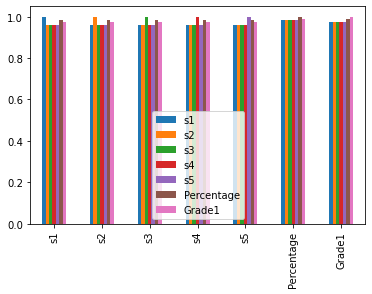

In [17]:
data.corr().plot(kind='bar')

<AxesSubplot:>

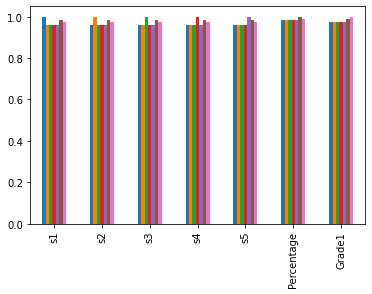

In [18]:
data.corr().plot(kind='bar', legend=False)

In [19]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.000000,0.989262
Grade1,0.989262,1.000000


# Find Grade (Rules) with Machine Learning

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

<img src="https://www.researchgate.net/profile/Nimmisha-Shajihan/publication/347447352/figure/fig3/AS:970048604741634@1608289018974/Performance-measurement-TP-TN-FP-FN-are-the-parameters-used-in-the-evaluation-of.jpg">
<img src="https://miro.medium.com/max/974/1*CNWo23_VnUJPXdfrqbiB0g.jpeg">

<img src="https://static.packt-cdn.com/products/9781785282287/graphics/B04223_10_02.jpg">

<img src="https://i.ytimg.com/vi/ji48Lz6amMc/maxresdefault.jpg">

In [32]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.000000,0.989262
Grade1,0.989262,1.000000


# Now select the feature based on above stats technique

In [33]:
data.head()

,s1,s2,s3,s4,s5,Percentage,Grade,Grade1
4880,60,66,68,62,65,64.2,B,5
2791,73,75,75,78,71,74.4,A,6
1769,45,43,46,48,40,44.4,D,3
6206,96,83,88,81,93,88.2,A+,7
5198,47,44,48,42,47,45.6,D,3


In [34]:
feature = ['Percentage']

X = data[feature]
Y = data.Grade



In [35]:
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,Percentage
4880,64.2
2791,74.4
1769,44.4
6206,88.2
5198,45.6


In [36]:
print(type(Y))
Y.head()

<class 'pandas.core.series.Series'>


4880     B
2791     A
1769     D
6206    A+
5198     D
Name: Grade, dtype: object

# Split data in Training and Test dataset
* X_train, X_test 
* Y_train, Y_test

In [37]:
print("X len",len(X),"Y len",len(Y))
print("train X",int(54432*70/100))
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=True)

print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

X len 53732 Y len 53732
train X 38102
37612
37612
16120
16120


# Classifier

In [38]:
clf = DecisionTreeClassifier()

In [40]:
clf = clf.fit(X_train, Y_train)

https://www.google.com/search?q=entropy+and+gini+index+decision+tree&source=lmns&tbm=vid&bih=636&biw=1296&hl=en&sa=X&ved=2ahUKEwjA7oW31J79AhXhpCcCHXgrAp0Q_AUoAnoECAEQAg

* entropy
* gini index

In [41]:
X_test

,Percentage
3430,45.0
2033,62.2
4113,65.2
3280,87.8
6226,72.8
...,...
1916,62.6
7140,36.0
1533,62.4
2810,73.8


In [42]:
Y_predict = clf.predict(X_test)
Y_predict

array(['D', 'B', 'B', ..., 'B', 'A', 'D'], dtype=object)

In [43]:
abc = X_test.copy()
abc['Actual_Y'] = Y_test
abc['predication'] = clf.predict(X_test)# add prediction column

abc

,Percentage,Actual_Y,predication
3430,45.0,D,D
2033,62.2,B,B
4113,65.2,B,B
3280,87.8,A+,A+
6226,72.8,A,A
...,...,...,...
1916,62.6,B,B
7140,36.0,E,E
1533,62.4,B,B
2810,73.8,A,A


In [45]:
print(metrics.classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2261
          A+       1.00      1.00      1.00      2341
           B       1.00      1.00      1.00      2315
           C       1.00      1.00      1.00      2309
           D       1.00      1.00      1.00      2286
           E       1.00      1.00      1.00      2348
        Fail       1.00      1.00      1.00      2260

    accuracy                           1.00     16120
   macro avg       1.00      1.00      1.00     16120
weighted avg       1.00      1.00      1.00     16120



In [46]:
clf.predict([[31]])

array(['E'], dtype=object)

# Display learning Rules

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(418.5, 489.24, 'X[0] <= 30.5\ngini = 0.857\nsamples = 37612\nvalue = [5415, 5335, 5361, 5367, 5390, 5328, 5416]\nclass = y[6]'),
 Text(342.40909090909093, 380.52000000000004, 'gini = 0.0\nsamples = 5416\nvalue = [0, 0, 0, 0, 0, 0, 5416]\nclass = y[6]'),
 Text(494.5909090909091, 380.52000000000004, 'X[0] <= 69.0\ngini = 0.833\nsamples = 32196\nvalue = [5415, 5335, 5361, 5367, 5390, 5328, 0]\nclass = y[0]'),
 Text(304.3636363636364, 271.8, 'X[0] <= 48.7\ngini = 0.75\nsamples = 21446\nvalue = [0, 0, 5361, 5367, 5390, 5328, 0]\nclass = y[4]'),
 Text(152.1818181818182, 163.08000000000004, 'X[0] <= 39.1\ngini = 0.5\nsamples = 10718\nvalue = [0, 0, 0, 0, 5390, 5328, 0]\nclass = y[4]'),
 Text(76.0909090909091, 54.360000000000014, 'gini = 0.0\nsamples = 5328\nvalue = [0, 0, 0, 0, 0, 5328, 0]\nclass = y[5]'),
 Text(228.27272727272728, 54.360000000000014, 'gini = 0.0\nsamples = 5390\nvalue = [0, 0, 0, 0, 5390, 0, 0]\nclass = y[4]'),
 Text(456.54545454545456, 163.08000000000004, 'X[0] <= 59.

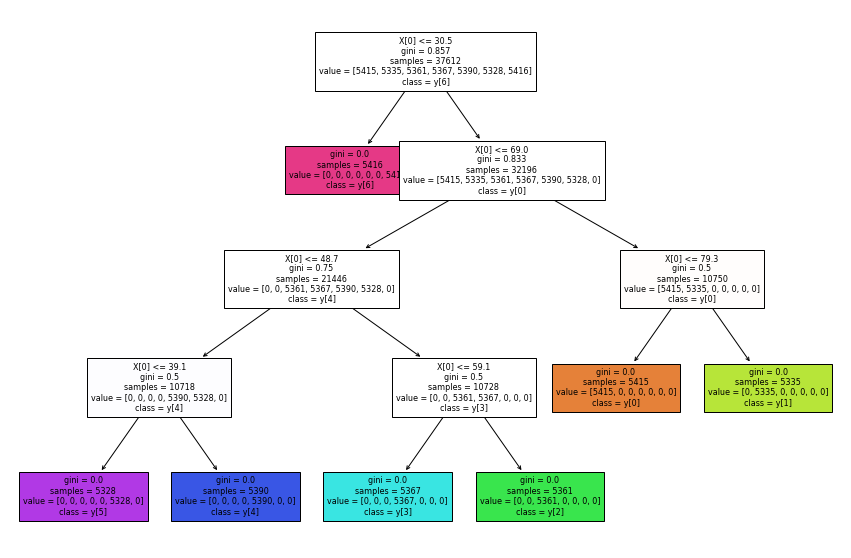

In [48]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, class_names=True, fontsize=8)

<img src="https://www.researchgate.net/profile/Jessica-Pickles-2/publication/339279807/figure/fig1/AS:891889284829201@1589654384981/Random-forests-are-collections-of-randomised-decision-trees-A-A-single-decision-tree.ppm">

In [52]:
clf.predict([[50]])

array(['C'], dtype=object)